## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9,0.7,0.5,0.3,0.1]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM  = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM  = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 4s 89us/step - loss: 0.4487 - accuracy: 0.8424 - val_loss: 1.9524 - val_accuracy: 0.5086
Epoch 49/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.4375 - accuracy: 0.8458 - val_loss: 1.9780 - val_accuracy: 0.5281
Epoch 50/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.4210 - accuracy: 0.8527 - val_loss: 1.9711 - val_accuracy: 0.5169
Experiment with MOMENTUM  = 0.700000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________

50000/50000 [==============================] - 5s 90us/step - loss: 0.8879 - accuracy: 0.6906 - val_loss: 1.4219 - val_accuracy: 0.5223
Epoch 47/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.8754 - accuracy: 0.6946 - val_loss: 1.4382 - val_accuracy: 0.5268
Epoch 48/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.8695 - accuracy: 0.6959 - val_loss: 1.3517 - val_accuracy: 0.5425
Epoch 49/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.8643 - accuracy: 0.6985 - val_loss: 1.4961 - val_accuracy: 0.5087
Epoch 50/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.8319 - accuracy: 0.7097 - val_loss: 1.4593 - val_accuracy: 0.5345
Experiment with MOMENTUM  = 0.500000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________________

50000/50000 [==============================] - 4s 89us/step - loss: 1.0933 - accuracy: 0.6172 - val_loss: 1.6917 - val_accuracy: 0.4398
Epoch 45/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.0822 - accuracy: 0.6207 - val_loss: 1.3952 - val_accuracy: 0.5066
Epoch 46/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.0792 - accuracy: 0.6213 - val_loss: 1.6215 - val_accuracy: 0.4579
Epoch 47/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.0667 - accuracy: 0.6256 - val_loss: 1.4024 - val_accuracy: 0.5148
Epoch 48/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.0560 - accuracy: 0.6296 - val_loss: 1.4180 - val_accuracy: 0.5077
Epoch 49/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.0468 - accuracy: 0.6319 - val_loss: 1.4334 - val_accuracy: 0.5001
Epoch 50/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.0401 - accuracy: 0.6345 - val_loss: 1.5274

50000/50000 [==============================] - 4s 90us/step - loss: 1.2145 - accuracy: 0.5752 - val_loss: 1.4678 - val_accuracy: 0.4848
Epoch 43/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.2082 - accuracy: 0.5768 - val_loss: 1.4225 - val_accuracy: 0.5004
Epoch 44/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.1965 - accuracy: 0.5805 - val_loss: 1.4335 - val_accuracy: 0.4945
Epoch 45/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.1923 - accuracy: 0.5830 - val_loss: 1.3894 - val_accuracy: 0.5032
Epoch 46/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.1810 - accuracy: 0.5857 - val_loss: 1.3963 - val_accuracy: 0.5061
Epoch 47/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.1766 - accuracy: 0.5863 - val_loss: 1.4237 - val_accuracy: 0.4979
Epoch 48/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.1647 - accuracy: 0.5918 - val_loss: 1.3928

50000/50000 [==============================] - 4s 88us/step - loss: 1.2675 - accuracy: 0.5540 - val_loss: 1.6389 - val_accuracy: 0.4379
Epoch 41/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.2688 - accuracy: 0.5561 - val_loss: 1.5140 - val_accuracy: 0.4608
Epoch 42/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.2561 - accuracy: 0.5602 - val_loss: 1.4159 - val_accuracy: 0.4889
Epoch 43/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.2460 - accuracy: 0.5651 - val_loss: 1.3885 - val_accuracy: 0.5026
Epoch 44/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.2405 - accuracy: 0.5657 - val_loss: 1.4704 - val_accuracy: 0.4805
Epoch 45/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.2333 - accuracy: 0.5675 - val_loss: 1.5364 - val_accuracy: 0.4524
Epoch 46/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.2301 - accuracy: 0.5694 - val_loss: 1.3870

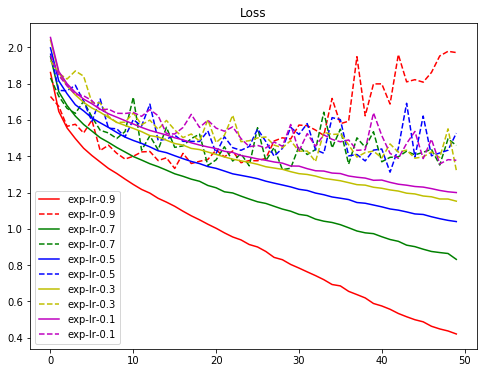

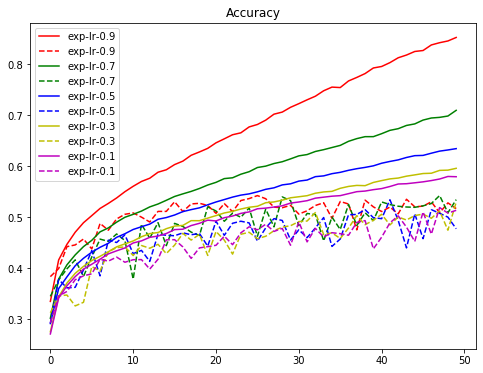

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()